In [1]:
## If Running in google colab
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! ls /content/drive/MyDrive/CSE\ 215

 Aurora_Evaluation.gdoc			       FPDB_evaluation.gdoc
 Azure_evaluation.gdoc			       JOB_evaluation.gdoc
 Bao_evaluation.gdoc			       many_to_one_cats_testing.ipynb
 BAO_Slides.gslides			       model_addition_testing.ipynb
 Data_Tamer_evaluation.gdoc		      'Project Proposal.gdoc'
 DeltaLake_evaluation.gdoc		       RocksDB_evaluation.gdoc
 display.csv				       scale_testing.ipynb
 display.gsheet				       scale_variance_take_two.ipynb
 Distributed_CC_Evaluation.gdoc		       scale_variance_testing.ipynb
 distribution_drift_testing.ipynb	       Snowflake_Evaluation.gdoc
 distribution_drift_testing_old.ipynb	       Spark_evaluation.gdoc
 Eliminating_Unscalable_Coms_evaluation.gdoc   stats_testing.ipynb
 F2FS_evaluation.gdoc			       testing_notebook.ipynb
 FalconDB_evaluation.gdoc		      'Untitled presentation.gslides'
 fdmc_subset.csv			      'Untitled spreadsheet.gsheet'
 file_layout.xlsx			       WBL_evaluation.gdoc
 fnma_subset.csv


In [3]:
!cp /content/drive/MyDrive/CSE\ 215/fdmc_subset.csv .
!cp /content/drive/MyDrive/CSE\ 215/fnma_subset.csv .

In [4]:
import numpy as np
import pandas as pd


fdmc = pd.read_csv('fdmc_subset.csv').drop(['Unnamed: 0', 'id_loan'], axis=1)
fnma = pd.read_csv('fnma_subset.csv').drop('Unnamed: 0', axis=1)

fdmc['POSTAL CODE'] = [int(str(val)[:3]) for val in fdmc['POSTAL CODE']]
fdmc['CREDIT SCORE'].loc[fdmc.index[fdmc['CREDIT SCORE'] == 9999]] = np.nan



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([  91.,  407.,  835., 1636., 2525., 3220., 3995., 5435., 5734.,
        1119.]),
 array([603. , 626.1, 649.2, 672.3, 695.4, 718.5, 741.6, 764.7, 787.8,
        810.9, 834. ]),
 <a list of 10 Patch objects>)

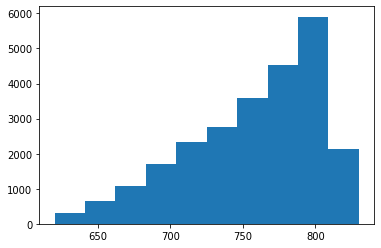

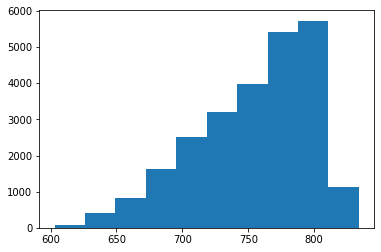

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(fnma['Borrower Credit Score at Origination'])
plt.figure()
plt.hist(fdmc['CREDIT SCORE'])

In [6]:
import string

LETTERS = string.ascii_letters

potential_cats_fdmc = []
potential_numeric_fdmc = []
nonunique_fdmc = []
for col in fdmc:
    has_letters = False
    letter_count = 0
    for val in fdmc[col]:
        if any([char in LETTERS for char in str(val)]):
            letter_count +=1 
    if letter_count > 0.95*fdmc.shape[0]:
        has_letters = True
    if len(fdmc[col].unique()) == 1:
        nonunique_fdmc.append(col)
        continue
    if has_letters or len(fdmc[col].unique())<10:
        potential_cats_fdmc.append(col)
    else:
        potential_numeric_fdmc.append(col)
fdmc_numeric = potential_numeric_fdmc
fdmc_cats = potential_cats_fdmc
print('FDMC Categorical')
print(potential_cats_fdmc)
print('FDMC Numeric')
print(potential_numeric_fdmc)
print('FDMC Nonunique')
print(nonunique_fdmc)


FDMC Categorical
['FIRST_PAYMENT_DATE', 'FIRST_TIME_HOMEBUYER_FLAG', 'MI_PERCENTAGE', 'NUMBER_OF_UNITS', 'OCCUPANCY_STATUS', 'CHANNEL', 'STATE', 'PROPERTY TYPE', 'LOAN_PURPOSE', 'NUMBER_BORROWERS', 'SELLER NAME', 'Servicer_Name', 'SUPER CONFORMING FLAG', 'PROGRAM INDICATOR', 'PROPERTY_VALUATION_METHOD']
FDMC Numeric
['CREDIT SCORE', 'MATURITY_DATE', 'MSA_CODE', 'ORIGINAL_CLTV', 'DTI', 'ORIGINAL_UPB', 'ORIGINAL_LTV', 'ORIGINAL_INTEREST_RATE', 'POSTAL CODE', 'ORIGINAL_LOAN_TERM']
FDMC Nonunique
['PPM_FLAG', 'Amortization_type', 'LSN', 'HARP_INDICATOR', 'IO_INDICATOR']


In [7]:
len(potential_numeric_fdmc)

10

In [8]:
potential_cats_fnma = []
potential_numeric_fnma = []
nonunique_fnma = []
for col in fnma:
    has_letters = False
    letter_count = 0
    for val in fnma[col]:
        if any([char in LETTERS for char in str(val)]):
            letter_count +=1 
    if letter_count > 0.95*fnma.shape[0]:
        has_letters = True
    if len(fnma[col].unique()) == 1:
        nonunique_fnma.append(col)
        continue
    if has_letters or len(fnma[col].unique())<10:
        potential_cats_fnma.append(col)
    else:
        potential_numeric_fnma.append(col)
fnma_numeric = potential_numeric_fnma
fnma_cats = potential_cats_fnma
print('FNMA Categorical')
print(potential_cats_fnma)
print('FNMA Numeric')
print(potential_numeric_fnma)
print('FNMA Nonunique')
print(nonunique_fnma)


FNMA Categorical
['Monthly Reporting Period', 'Channel', 'Seller Name', 'Servicer Name', 'First Payment Date', 'Number of Borrowers', 'First Time Home Buyer Indicator', 'Loan Purpose', 'Property Type', 'Number of Units', 'Occupancy Status', 'Property State', 'Mortgage Insurance Percentage', 'Current Loan Delinquency Status', 'Loan Payment History', 'Modification Flag', 'Zero Balance Code', 'Zero Balance Effective Date', 'UPB at the Time of Removal', 'Mortgage Insurance Type', 'Servicing Activity Indicator', 'HomeReady® Program Indicator', 'Relocation Mortgage Indicator', 'Property Valuation Method', 'High Balance Loan Indicator', 'Borrower Assistance Plan', 'Alternative Delinquency Resolution']
FNMA Numeric
['Loan Identifier', 'Original Interest Rate', 'Current Interest Rate', 'Original UPB', 'Current Actual UPB', 'Original Loan Term', 'Origination Date', 'Loan Age', 'Remaining Months to Legal Maturity', 'Remaining Months To Maturity', 'Maturity Date', 'Original Loan to Value Ratio (LT

In [9]:
len(potential_cats_fnma)

27

In [10]:
match_list = {
    'FIRST_PAYMENT_DATE':'First Payment Date', 
    'FIRST_TIME_HOMEBUYER_FLAG':'First Time Home Buyer Indicator', 
    'MI_PERCENTAGE':'Mortgage Insurance Percentage', 
    'NUMBER_OF_UNITS':'Number of Units', 
    'OCCUPANCY_STATUS':'Occupancy Status', 
    'CHANNEL':'Channel', 
    'STATE':'Property State', 
    'PROPERTY TYPE':'Property Type',
    'LOAN_PURPOSE':'Loan Purpose', 
    'NUMBER_BORROWERS':'Number of Borrowers', 
    'SELLER NAME':'Seller Name', 
    'Servicer_Name':'Servicer Name', 
    'SUPER CONFORMING FLAG':'High Balance Loan Indicator', 
    'PROGRAM INDICATOR':'HomeReady® Program Indicator', 
    'PROPERTY_VALUATION_METHOD':'Property Valuation Method',
    'CREDIT SCORE':'Borrower Credit Score at Origination',
    'MATURITY_DATE':'Maturity Date', 
    'MSA_CODE':'Metropolitan Statistical Area (MSA)', 
    'ORIGINAL_CLTV':'Original Combined Loan to Value Ratio\n(CLTV)', 
    'DTI':'Debt-To-Income (DTI)', 
    'ORIGINAL_UPB':'Original UPB', 
    'ORIGINAL_LTV':'Original Loan to Value Ratio (LTV)', 
    'ORIGINAL_INTEREST_RATE':'Original Interest Rate', 
    'POSTAL CODE':'Zip Code Short', 
    'ORIGINAL_LOAN_TERM':'Original Loan Term'
}


## LR and XGB tests on numeric and categorical data

In [12]:
# Define unique null placeholder for schema that doesn't interfere with known columns
import copy 
from scipy import stats
from sklearn.preprocessing import StandardScaler

fdmc_copy = copy.deepcopy(fdmc)
for col in potential_numeric_fdmc:
    fdmc_copy[col] = fdmc_copy[col].fillna(np.mean(fdmc_copy[col]))

fnma_copy = copy.deepcopy(fnma)
for col in potential_numeric_fnma:
    fnma_copy[col] = fnma_copy[col].fillna(np.mean(fnma_copy[col]))

def standardize_labels(col):
    col = copy.deepcopy(col)
    value_counts = col.value_counts(dropna = False)
    for i in range(len(value_counts)):
        if str(value_counts.index[i]) == 'nan':
            col.loc[col.isnull()] = i+1
        else:
            col.loc[col == value_counts.index[i]] = i+1
    return col

for col in potential_cats_fdmc:
    fdmc_copy[col] = standardize_labels(fdmc_copy[col])

for col in potential_cats_fnma:
    fnma_copy[col] = standardize_labels(fnma_copy[col])



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler


col_match_lr_num = {}

unmatchable = []
for col1 in fdmc_copy[fdmc_numeric]:
    cols = []
    lr_vals = []
    for col2 in fnma_copy[fnma_numeric]:
        try:
            x_data = fdmc_copy[col1].append(fnma_copy[col2])
            fdmc_labels = pd.Series([0]*fdmc.shape[0])
            fnma_labels = pd.Series([1]*fnma.shape[0])
            y_data = fdmc_labels.append(fnma_labels)
            lr = LogisticRegression(penalty='l2', max_iter=1000)
            lr.fit(np.asarray(x_data).reshape(-1, 1), y_data)
            auc = roc_auc_score(y_data, lr.predict_proba(np.asarray(x_data).reshape(-1, 1))[:, 1])

            lr_vals.append(auc)
            cols.append(col2)
        except:
            unmatchable.append([col1, col2])
    ind = np.asarray(lr_vals).argsort()[:3]
    col_match_lr_num[col1] = [[cols[i] for i in ind], [lr_vals[i] for i in ind]]

col_match_lr_num


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

{'CREDIT SCORE': [['Borrower Credit Score at Origination',
   'Total Principal Current',
   'Co-Borrower Credit Score at Origination'],
  [0.5216998976, 0.523106936, 0.5233181336]],
 'DTI': [['Debt-To-Income (DTI)',
   'Total Principal Current',
   'Metropolitan Statistical Area (MSA)'],
  [0.5184815008, 0.8854133408, 0.91416]],
 'MATURITY_DATE': [['Current Actual UPB',
   'Original UPB',
   'Total Principal Current'],
  [0.6220609344, 0.6266840624000001, 0.9983523808]],
 'MSA_CODE': [['Metropolitan Statistical Area (MSA)',
   'Origination Date',
   'Maturity Date'],
  [0.5430705056, 0.9882908143999999, 0.9936814624000001]],
 'ORIGINAL_CLTV': [['Original Loan to Value Ratio (LTV)',
   'Original Combined Loan to Value Ratio\n(CLTV)',
   'Total Principal Current'],
  [0.5269904824000001, 0.5307074272, 0.8845351944000001]],
 'ORIGINAL_INTEREST_RATE': [['Original Interest Rate',
   'Current Interest Rate',
   'Total Principal Current'],
  [0.5978609288, 0.597988904, 0.8858519816]],
 'ORIGI

In [14]:
num_right = 0

for val in col_match_lr_num.keys():
    col_match_names = col_match_lr_num[val][0]
    if col_match_names[0] == match_list[val]:
        num_right += 1
LR_corr_num = num_right / (len(col_match_lr_num.keys()))

print('LR-test % correct numeric = {}'.format(LR_corr_num))


LR-test % correct numeric = 0.8


In [15]:
auc_vals = np.arange(0.51, 0.7, 0.01)
prec = []
recall = []
for auc in auc_vals:
    num_identified_correct = 0
    num_identified = 0
    for val in col_match_lr_num.keys():
        if col_match_lr_num[val][1][0] <= auc:
            num_identified += 1
            if col_match_lr_num[val][0][0] == match_list[val]:
                num_identified_correct += 1
    prec.append(num_identified_correct/num_identified)
    recall.append(num_identified_correct/len(col_match_lr_num.keys()))
print(prec)
print(recall)




[1.0, 1.0, 0.8333333333333334, 0.8571428571428571, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
[0.1, 0.2, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


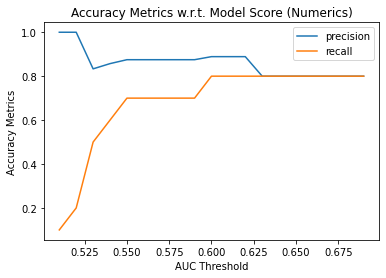

In [16]:
plt.figure()

plt.plot(auc_vals, prec, label='precision')
plt.plot(auc_vals, recall, label='recall')
plt.xlabel('AUC Threshold')
plt.ylabel('Accuracy Metrics')
plt.title('Accuracy Metrics w.r.t. Model Score (Numerics)')
plt.legend()
plt.show()



In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize_numeric(col):
    col = np.asarray(col.copy()).reshape(-1, 1)
    scaler = MinMaxScaler()
    scaler.fit(col)
    col = scaler.transform(col)
    return col

def standardize_numeric(col):
    col = np.asarray(col.copy()).reshape(-1, 1)
    scaler = StandardScaler()
    scaler.fit(col)
    col = scaler.transform(col)
    return col

fdmc_norm = normalize_numeric(fdmc['CREDIT SCORE'])
fdmc_stand = standardize_numeric(fdmc['CREDIT SCORE'])



Text(0.5, 0, 'Credit Score Standardized')

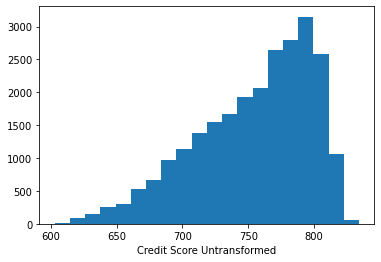

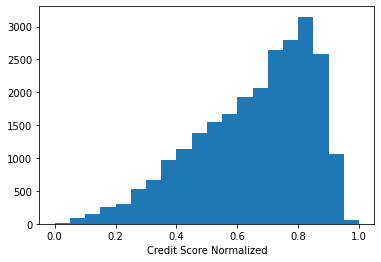

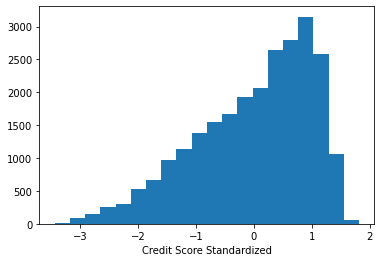

In [18]:
plt.figure()
plt.hist(fdmc['CREDIT SCORE'], bins=20)
plt.xlabel('Credit Score Untransformed')
plt.figure()
plt.hist(fdmc_norm, bins=20)
plt.xlabel('Credit Score Normalized')
plt.figure()
plt.hist(fdmc_stand, bins=20)
plt.xlabel('Credit Score Standardized')

In [19]:
col_match_lr_cat = {}

unmatchable = []
for col1 in fdmc_copy[fdmc_cats]:
    cols = []
    lr_vals = []
    for col2 in fnma_copy[fnma_cats]:
        try:
            x_data = fdmc_copy[col1].append(fnma_copy[col2])
            fdmc_labels = pd.Series([0]*fdmc.shape[0])
            fnma_labels = pd.Series([1]*fnma.shape[0])
            y_data = fdmc_labels.append(fnma_labels)
            lr = LogisticRegression(penalty='l2', max_iter=1000)
            lr.fit(np.asarray(x_data).reshape(-1, 1), y_data)
            auc = roc_auc_score(y_data, lr.predict_proba(np.asarray(x_data).reshape(-1, 1))[:, 1])

            lr_vals.append(auc)
            cols.append(col2)
        except:
            unmatchable.append([col1, col2])
    ind = np.asarray(lr_vals).argsort()[:3]
    col_match_lr_cat[col1] = [[cols[i] for i in ind], [lr_vals[i] for i in ind]]

col_match_lr_cat

{'CHANNEL': [['Mortgage Insurance Percentage',
   'First Payment Date',
   'Number of Borrowers'],
  [0.4451025792, 0.4852260096, 0.507559824]],
 'FIRST_PAYMENT_DATE': [['Seller Name',
   'Servicer Name',
   'Current Loan Delinquency Status'],
  [0.4233716112, 0.47425805359999995, 0.55438]],
 'FIRST_TIME_HOMEBUYER_FLAG': [['Occupancy Status',
   'HomeReady® Program Indicator',
   'High Balance Loan Indicator'],
  [0.536181444, 0.53748, 0.54388]],
 'LOAN_PURPOSE': [['Loan Purpose',
   'Monthly Reporting Period',
   'Loan Payment History'],
  [0.50960406, 0.5730392264, 0.5758509824]],
 'MI_PERCENTAGE': [['Property Valuation Method',
   'First Time Home Buyer Indicator',
   'Mortgage Insurance Percentage'],
  [0.4529805552, 0.505679664, 0.530695076]],
 'NUMBER_BORROWERS': [['Mortgage Insurance Percentage',
   'Property Type',
   'First Payment Date'],
  [0.4298888256000001, 0.4744646144, 0.4781913056]],
 'NUMBER_OF_UNITS': [['UPB at the Time of Removal',
   'Number of Units',
   'Borrower

In [20]:
num_right = 0

for val in col_match_lr_cat.keys():
    col_match_names = col_match_lr_cat[val][0]
    if col_match_names[0] == match_list[val]:
        num_right += 1
LR_corr_cat = num_right / (len(col_match_lr_cat.keys()))

print('LR-test % correct categorical = {}'.format(LR_corr_cat))


LR-test % correct categorical = 0.26666666666666666


In [21]:
import xgboost as xgb

col_match_xgb_cat = {}

unmatchable = []
for col1 in fdmc_copy[fdmc_cats]:
    cols = []
    auc_vals = []
    for col2 in fnma_copy[fnma_cats]:
        try:
            x_data = fdmc_copy[col1].append(fnma_copy[col2])
            fdmc_labels = pd.Series([0]*fdmc.shape[0])
            fnma_labels = pd.Series([1]*fnma.shape[0])
            y_data = fdmc_labels.append(fnma_labels)
            xgbclf = xgb.XGBClassifier(n_estimators = len(fdmc_copy[col1].value_counts()))
            xgbclf.fit(np.asarray(x_data).reshape(-1, 1), y_data)
            auc = roc_auc_score(y_data, xgbclf.predict_proba(np.asarray(x_data).reshape(-1, 1))[:, 1])

            auc_vals.append(auc)
            cols.append(col2)
        except:
            unmatchable.append([col1, col2])
    ind = np.asarray(auc_vals).argsort()[:3]
    col_match_xgb_cat[col1] = [[cols[i] for i in ind], [auc_vals[i] for i in ind]]

col_match_xgb_cat



{'CHANNEL': [['Property Type', 'First Payment Date', 'Channel'],
  [0.5323026272, 0.5542939903999999, 0.5578882848]],
 'FIRST_PAYMENT_DATE': [['Loan Payment History',
   'Monthly Reporting Period',
   'Loan Purpose'],
  [0.7368193408, 0.7414184224, 0.7638872848]],
 'FIRST_TIME_HOMEBUYER_FLAG': [['HomeReady® Program Indicator',
   'High Balance Loan Indicator',
   'First Time Home Buyer Indicator'],
  [0.53748, 0.54388, 0.5472999999999999]],
 'LOAN_PURPOSE': [['Loan Purpose',
   'Monthly Reporting Period',
   'Loan Payment History'],
  [0.52119594, 0.5730392264, 0.5758509824]],
 'MI_PERCENTAGE': [['Mortgage Insurance Percentage',
   'Occupancy Status',
   'HomeReady® Program Indicator'],
  [0.540511168, 0.5780879136, 0.5796993864]],
 'NUMBER_BORROWERS': [['Number of Borrowers',
   'Property Valuation Method',
   'Property Type'],
  [0.5112772959999999, 0.5705950912000001, 0.6188956992000001]],
 'NUMBER_OF_UNITS': [['Borrower Assistance Plan',
   'Number of Units',
   'Relocation Mortgag

In [22]:
num_right = 0

for val in col_match_xgb_cat.keys():
    col_match_names = col_match_xgb_cat[val][0]
    if len(col_match_names)>0:
        if col_match_names[0] == match_list[val]:
            num_right += 1
XGB_corr_cat = num_right / (len(col_match_xgb_cat.keys()))

print('XGB-test % correct categorical = {}'.format(XGB_corr_cat))


XGB-test % correct categorical = 0.5333333333333333


In [23]:
def standardize_labels(col):
    col = copy.deepcopy(col)
    value_counts = col.value_counts(dropna = False)
    for i in range(len(value_counts)):
        if str(value_counts.index[i]) == 'nan':
            col.loc[col.isnull()] = i+1
        else:
            col.loc[col == value_counts.index[i]] = i+1
    return col

for col in potential_cats_fdmc:
    fdmc_copy[col] = standardize_labels(fdmc_copy[col])

for col in potential_cats_fnma:
    fnma_copy[col] = standardize_labels(fnma_copy[col])

def normalize_numeric(col):
    col = np.asarray(col.copy()).reshape(-1, 1)
    scaler = MinMaxScaler()
    scaler.fit(col)
    col = scaler.transform(col)
    return col
    
for col in fdmc_numeric:
    fdmc_copy[col] = normalize_numeric(fdmc_copy[col])
for col in fnma_numeric:
    fnma_copy[col] = normalize_numeric(fnma_copy[col])

In [24]:
fdmc_copy[fdmc_numeric]

,CREDIT SCORE,MATURITY_DATE,MSA_CODE,ORIGINAL_CLTV,DTI,ORIGINAL_UPB,ORIGINAL_LTV,ORIGINAL_INTEREST_RATE,POSTAL CODE,ORIGINAL_LOAN_TERM
0,0.748918,0.997280,0.513507,0.475248,0.224490,0.033856,0.516129,0.200000,0.570634,1.000000
1,0.619048,0.997280,0.513507,0.900990,0.653061,0.040462,0.978495,0.300000,0.053393,1.000000
2,0.679654,0.997280,0.513507,0.732673,0.448980,0.147812,0.795699,0.266667,0.493882,1.000000
3,0.515152,0.997280,0.171992,0.841584,0.795918,0.269199,0.913978,0.300000,0.561735,1.000000
4,0.683983,0.997280,0.476239,0.514851,1.000000,0.083402,0.559140,0.266667,0.410456,1.000000
...,...,...,...,...,...,...,...,...,...,...
24995,0.519481,0.999093,0.821537,0.603960,0.877551,0.423617,0.655914,0.400000,0.254727,1.000000
24996,0.385281,0.999547,0.047523,0.584158,0.836735,0.180017,0.634409,0.466667,0.222469,1.000000
24997,0.848485,0.319583,0.396360,0.504950,0.612245,0.113130,0.548387,0.266667,0.206897,0.318182
24998,0.896104,0.999547,0.048534,0.801980,0.653061,0.091660,0.870968,0.333333,0.823137,1.000000


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


col_match_lr_num = {}

unmatchable = []
for col1 in fdmc_copy[fdmc_numeric]:
    cols = []
    lr_vals = []
    for col2 in fnma_copy[fnma_numeric]:
        try:
            x_data = fdmc_copy[col1].append(fnma_copy[col2])
            fdmc_labels = pd.Series([0]*fdmc.shape[0])
            fnma_labels = pd.Series([1]*fnma.shape[0])
            y_data = fdmc_labels.append(fnma_labels)
            lr = LogisticRegression(penalty='l2', max_iter=1000)
            lr.fit(np.asarray(x_data).reshape(-1, 1), y_data)
            auc = roc_auc_score(y_data, lr.predict_proba(np.asarray(x_data).reshape(-1, 1))[:, 1])

            lr_vals.append(auc)
            cols.append(col2)
        except:
            unmatchable.append([col1, col2])
    ind = np.asarray(lr_vals).argsort()[:3]
    col_match_lr_num[col1] = [[cols[i] for i in ind], [lr_vals[i] for i in ind]]

col_match_lr_num


{'CREDIT SCORE': [['Borrower Credit Score at Origination',
   'Co-Borrower Credit Score at Origination',
   'Original Combined Loan to Value Ratio\n(CLTV)'],
  [0.4909852984, 0.49197494960000004, 0.5020662816]],
 'DTI': [['Co-Borrower Credit Score at Origination',
   'Borrower Credit Score at Origination',
   'Original Combined Loan to Value Ratio\n(CLTV)'],
  [0.49687867999999996, 0.503678184, 0.5066512935999999]],
 'MATURITY_DATE': [['Remaining Months To Maturity',
   'Remaining Months to Legal Maturity',
   'Original Loan to Value Ratio (LTV)'],
  [0.3922704912, 0.721018792, 0.7265715712]],
 'MSA_CODE': [['Loan Identifier', 'Debt-To-Income (DTI)', 'Maturity Date'],
  [0.5134356832, 0.5229014128, 0.5262289968]],
 'ORIGINAL_CLTV': [['Original Combined Loan to Value Ratio\n(CLTV)',
   'Co-Borrower Credit Score at Origination',
   'Borrower Credit Score at Origination'],
  [0.5083017128, 0.5235038832, 0.5298167927999999]],
 'ORIGINAL_INTEREST_RATE': [['Current Actual UPB',
   'Original 

In [26]:
num_right = 0

for val in col_match_lr_num.keys():
    col_match_names = col_match_lr_num[val][0]
    if col_match_names[0] == match_list[val]:
        num_right += 1
LR_corr_num = num_right / (len(col_match_lr_num.keys()))

print('LR-test % correct categorical = {}'.format(LR_corr_num))

LR-test % correct categorical = 0.3


In [27]:
import xgboost as xgb

col_match_xgb_cat = {}

unmatchable = []
for col1 in fdmc_copy[fdmc_cats]:
    cols = []
    auc_vals = []
    for col2 in fnma_copy[fnma_cats]:
        try:
            x_data = fdmc_copy[col1].append(fnma_copy[col2])
            fdmc_labels = pd.Series([0]*fdmc.shape[0])
            fnma_labels = pd.Series([1]*fnma.shape[0])
            y_data = fdmc_labels.append(fnma_labels)
            xgbclf = xgb.XGBClassifier(n_estimators = len(fdmc_copy[col1].value_counts()))
            xgbclf.fit(np.asarray(x_data).reshape(-1, 1), y_data)
            auc = roc_auc_score(y_data, xgbclf.predict_proba(np.asarray(x_data).reshape(-1, 1))[:, 1])

            auc_vals.append(auc)
            cols.append(col2)
        except:
            unmatchable.append([col1, col2])
    ind = np.asarray(auc_vals).argsort()[:3]
    col_match_xgb_cat[col1] = [[cols[i] for i in ind], [auc_vals[i] for i in ind]]

col_match_xgb_cat



{'CHANNEL': [['Property Type', 'First Payment Date', 'Channel'],
  [0.5323026272, 0.5542939903999999, 0.5578882848]],
 'FIRST_PAYMENT_DATE': [['Loan Payment History',
   'Monthly Reporting Period',
   'Loan Purpose'],
  [0.7368193408, 0.7414184224, 0.7638872848]],
 'FIRST_TIME_HOMEBUYER_FLAG': [['HomeReady® Program Indicator',
   'High Balance Loan Indicator',
   'First Time Home Buyer Indicator'],
  [0.53748, 0.54388, 0.5472999999999999]],
 'LOAN_PURPOSE': [['Loan Purpose',
   'Monthly Reporting Period',
   'Loan Payment History'],
  [0.52119594, 0.5730392264, 0.5758509824]],
 'MI_PERCENTAGE': [['Mortgage Insurance Percentage',
   'Occupancy Status',
   'HomeReady® Program Indicator'],
  [0.5380415159999999, 0.5780879136, 0.5796993864]],
 'NUMBER_BORROWERS': [['Number of Borrowers',
   'Property Valuation Method',
   'Property Type'],
  [0.5112772959999999, 0.5705950912000001, 0.6188956992000001]],
 'NUMBER_OF_UNITS': [['Number of Units',
   'Borrower Assistance Plan',
   'Relocation 

In [28]:
num_right = 0

for val in col_match_xgb_cat.keys():
    col_match_names = col_match_xgb_cat[val][0]
    if col_match_names[0] == match_list[val]:
        num_right += 1
XGB_corr_cat = num_right / (len(col_match_xgb_cat.keys()))

print('XGB-test % correct categorical = {}'.format(XGB_corr_cat))


XGB-test % correct categorical = 0.6


In [29]:
auc_vals = np.arange(0.51, 0.7, 0.01)
prec = []
recall = []
for auc in auc_vals:
    num_identified_correct = 0
    num_identified = 0
    for val in col_match_xgb_cat.keys():
        if col_match_xgb_cat[val][1][0] <= auc:
            num_identified += 1
            if col_match_xgb_cat[val][0][0] == match_list[val]:
                num_identified_correct += 1
    prec.append(num_identified_correct/num_identified)
    recall.append(num_identified_correct/len(col_match_xgb_cat.keys()))
print(prec)
print(recall)


[0.5, 0.7142857142857143, 0.75, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429]
[0.13333333333333333, 0.3333333333333333, 0.4, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]


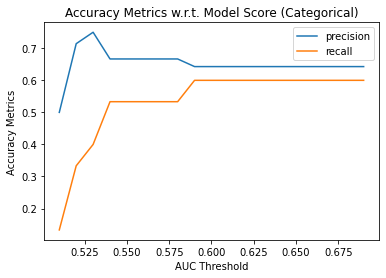

In [30]:
plt.figure()

plt.plot(auc_vals, prec, label='precision')
plt.plot(auc_vals, recall, label='recall')
plt.xlabel('AUC Threshold')
plt.ylabel('Accuracy Metrics')
plt.title('Accuracy Metrics w.r.t. Model Score (Categorical)')
plt.legend()
plt.show()
